In [21]:
#!/usr/bin/env python3
#!/usr/bin/env python3
"""
补齐REMIND成本文件中缺失的单位格式
基于2045年文件的完整单位格式来补齐其他年份文件
"""

import pandas as pd
import glob
import os
from pathlib import Path

def fix_remind_units():
    """补齐REMIND成本文件中缺失的单位格式"""
    
    # 读取2045年文件作为参考
    reference_file = '../../resources/derived_data/remindcosts/costs_2045.csv'
    reference_df = pd.read_csv(reference_file)
    
    # 提取investment参数的单位映射
    investment_units = {}
    for _, row in reference_df[reference_df['parameter'] == 'investment'].iterrows():
        tech = row['technology']
        unit = row['unit']
        if pd.notna(unit) and unit.strip():  # 确保单位不为空
            investment_units[tech] = unit
    
    print(f"从2045年文件中提取到 {len(investment_units)} 个技术的单位信息")
    print("单位映射:")
    for tech, unit in investment_units.items():
        print(f"  {tech}: {unit}")
    
    # 获取所有年份文件
    remind_files = glob.glob('../../resources/derived_data/remindcosts/costs_*.csv')
    print(f"\n找到的所有文件: {len(remind_files)} 个")
    
    # 排除参考文件
    remind_files = [f for f in remind_files if os.path.basename(f) != 'costs_2045.csv']
    
    print(f"需要处理的文件数量: {len(remind_files)}")
    
    for file_path in remind_files:
        print(f"\n处理文件: {file_path}")
        
        # 读取文件
        df = pd.read_csv(file_path)
        
        # 统计修复前的空单位数量（包括空格字符）
        investment_rows = df[df['parameter'] == 'investment']
        empty_units_before = (investment_rows['unit'].isna().sum() + 
                             (investment_rows['unit'] == '').sum() + 
                             (investment_rows['unit'] == ' ').sum())
        
        # 修复investment参数的空单位
        fixed_count = 0
        for tech, unit in investment_units.items():
            mask = (df['technology'] == tech) & (df['parameter'] == 'investment')
            if mask.any():
                # 检查当前单位是否为空或空格
                current_unit = df.loc[mask, 'unit'].iloc[0]
                if pd.isna(current_unit) or current_unit == '' or current_unit == ' ':
                    df.loc[mask, 'unit'] = unit
                    print(f"  修复 {tech}: '{current_unit}' -> '{unit}'")
                    fixed_count += 1
        
        # 统计修复后的空单位数量
        investment_rows_after = df[df['parameter'] == 'investment']
        empty_units_after = (investment_rows_after['unit'].isna().sum() + 
                            (investment_rows_after['unit'] == '').sum() + 
                            (investment_rows_after['unit'] == ' ').sum())
        
        print(f"  修复前空单位: {empty_units_before}, 修复后空单位: {empty_units_after}, 修复了 {fixed_count} 个")
        
        # 保存修复后的文件
        df.to_csv(file_path, index=False)
        print(f"  文件已保存: {file_path}")

def verify_fix():
    """验证修复结果"""
    print("\n=== 验证修复结果 ===")
    
    remind_files = glob.glob('../../resources/derived_data/remindcosts/costs_*.csv')
    
    for file_path in remind_files:
        df = pd.read_csv(file_path)
        investment_rows = df[df['parameter'] == 'investment']
        empty_units = (investment_rows['unit'].isna().sum() + 
                      (investment_rows['unit'] == '').sum() + 
                      (investment_rows['unit'] == ' ').sum())
        
        year = file_path.split('_')[-1].replace('.csv', '')
        print(f"{year}: {empty_units} 个空单位")

def check_specific_technologies():
    """检查特定技术的单位修复情况"""
    print("\n=== 检查特定技术的单位修复情况 ===")
    
    technologies_to_check = ['coal', 'biomass', 'CCGT', 'nuclear', 'lignite']
    
    for tech in technologies_to_check:
        print(f"\n{tech} 技术的investment单位:")
        for year in [2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2070, 2080, 2090, 2100]:
            file_path = f'../../resources/derived_data/remindcosts/costs_{year}.csv'
            df = pd.read_csv(file_path)
            
            tech_investment = df[(df['technology'] == tech) & (df['parameter'] == 'investment')]
            if not tech_investment.empty:
                unit = tech_investment['unit'].iloc[0]
                print(f"  {year}: '{unit}'")

if __name__ == "__main__":
    print("开始修复REMIND成本文件的单位格式...")
    fix_remind_units()
    verify_fix()
    check_specific_technologies()
    print("\n修复完成！") 

开始修复REMIND成本文件的单位格式...
从2045年文件中提取到 32 个技术的单位信息
单位映射:
  battery inverter: EUR/kW
  battery storage: EUR/kWh
  biomass: USD/MW
  CCGT: USD/MW
  coal: USD/MW
  csp-tower power block: EUR/kW_e
  electrolysis: USD/MW
  fuel cell: USD/MW
  gas: USD/MW
  H2 (g) pipeline: EUR/MW/km
  HVAC overhead: EUR/km/MW
  HVDC inverter pair: EUR/MW
  HVDC overhead: EUR/km/MW
  HVDC submarine: EUR/MW/km
  hydro: EUR/kWel
  hydrogen storage tank type 1: EUR/kWh_H2
  hydrogen storage tank type 1 including compressor: EUR/kWh
  hydrogen storage underground: EUR/kWh
  lignite: USD/MW
  nuclear: USD/MW
  OCGT: USD/MW
  offwind: USD/MW
  offwind-ac-connection-submarine: USD/MW/km
  offwind-ac-connection-underground: USD/MW/km
  offwind-ac-station: USD/MW
  offwind-dc-connection-submarine: USD/MW/km
  offwind-dc-connection-underground: USD/MW/km
  offwind-dc-station: USD/MW
  oil: USD/MW
  onwind: USD/MW
  PHS: EUR/kWel
  solar: USD/MW

找到的所有文件: 13 个
需要处理的文件数量: 12

处理文件: ../../resources/derived_data/remindcosts/

开始处理三个数据源的成本数据...
处理文献综述数据...
成功使用 gbk 编码读取文献综述文件
investment类型数据形状: (64, 11)
有映射技术的数据形状: (56, 12)
文献综述数据处理完成，形状: (268, 4)
处理REMIND数据...
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2025.csv (年份: 2025)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2050.csv (年份: 2050)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2020.csv (年份: 2020)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2040.csv (年份: 2040)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2035.csv (年份: 2035)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2060.csv (年份: 2060)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2055.csv (年份: 2055)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2080.csv (年份: 2080)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2030.csv (年份: 2030)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2070.csv (年份: 2070)
正在处理REMIND ../../resources/derived_data/remindcosts/costs_2045.csv (年份: 2045)
正在处理RE

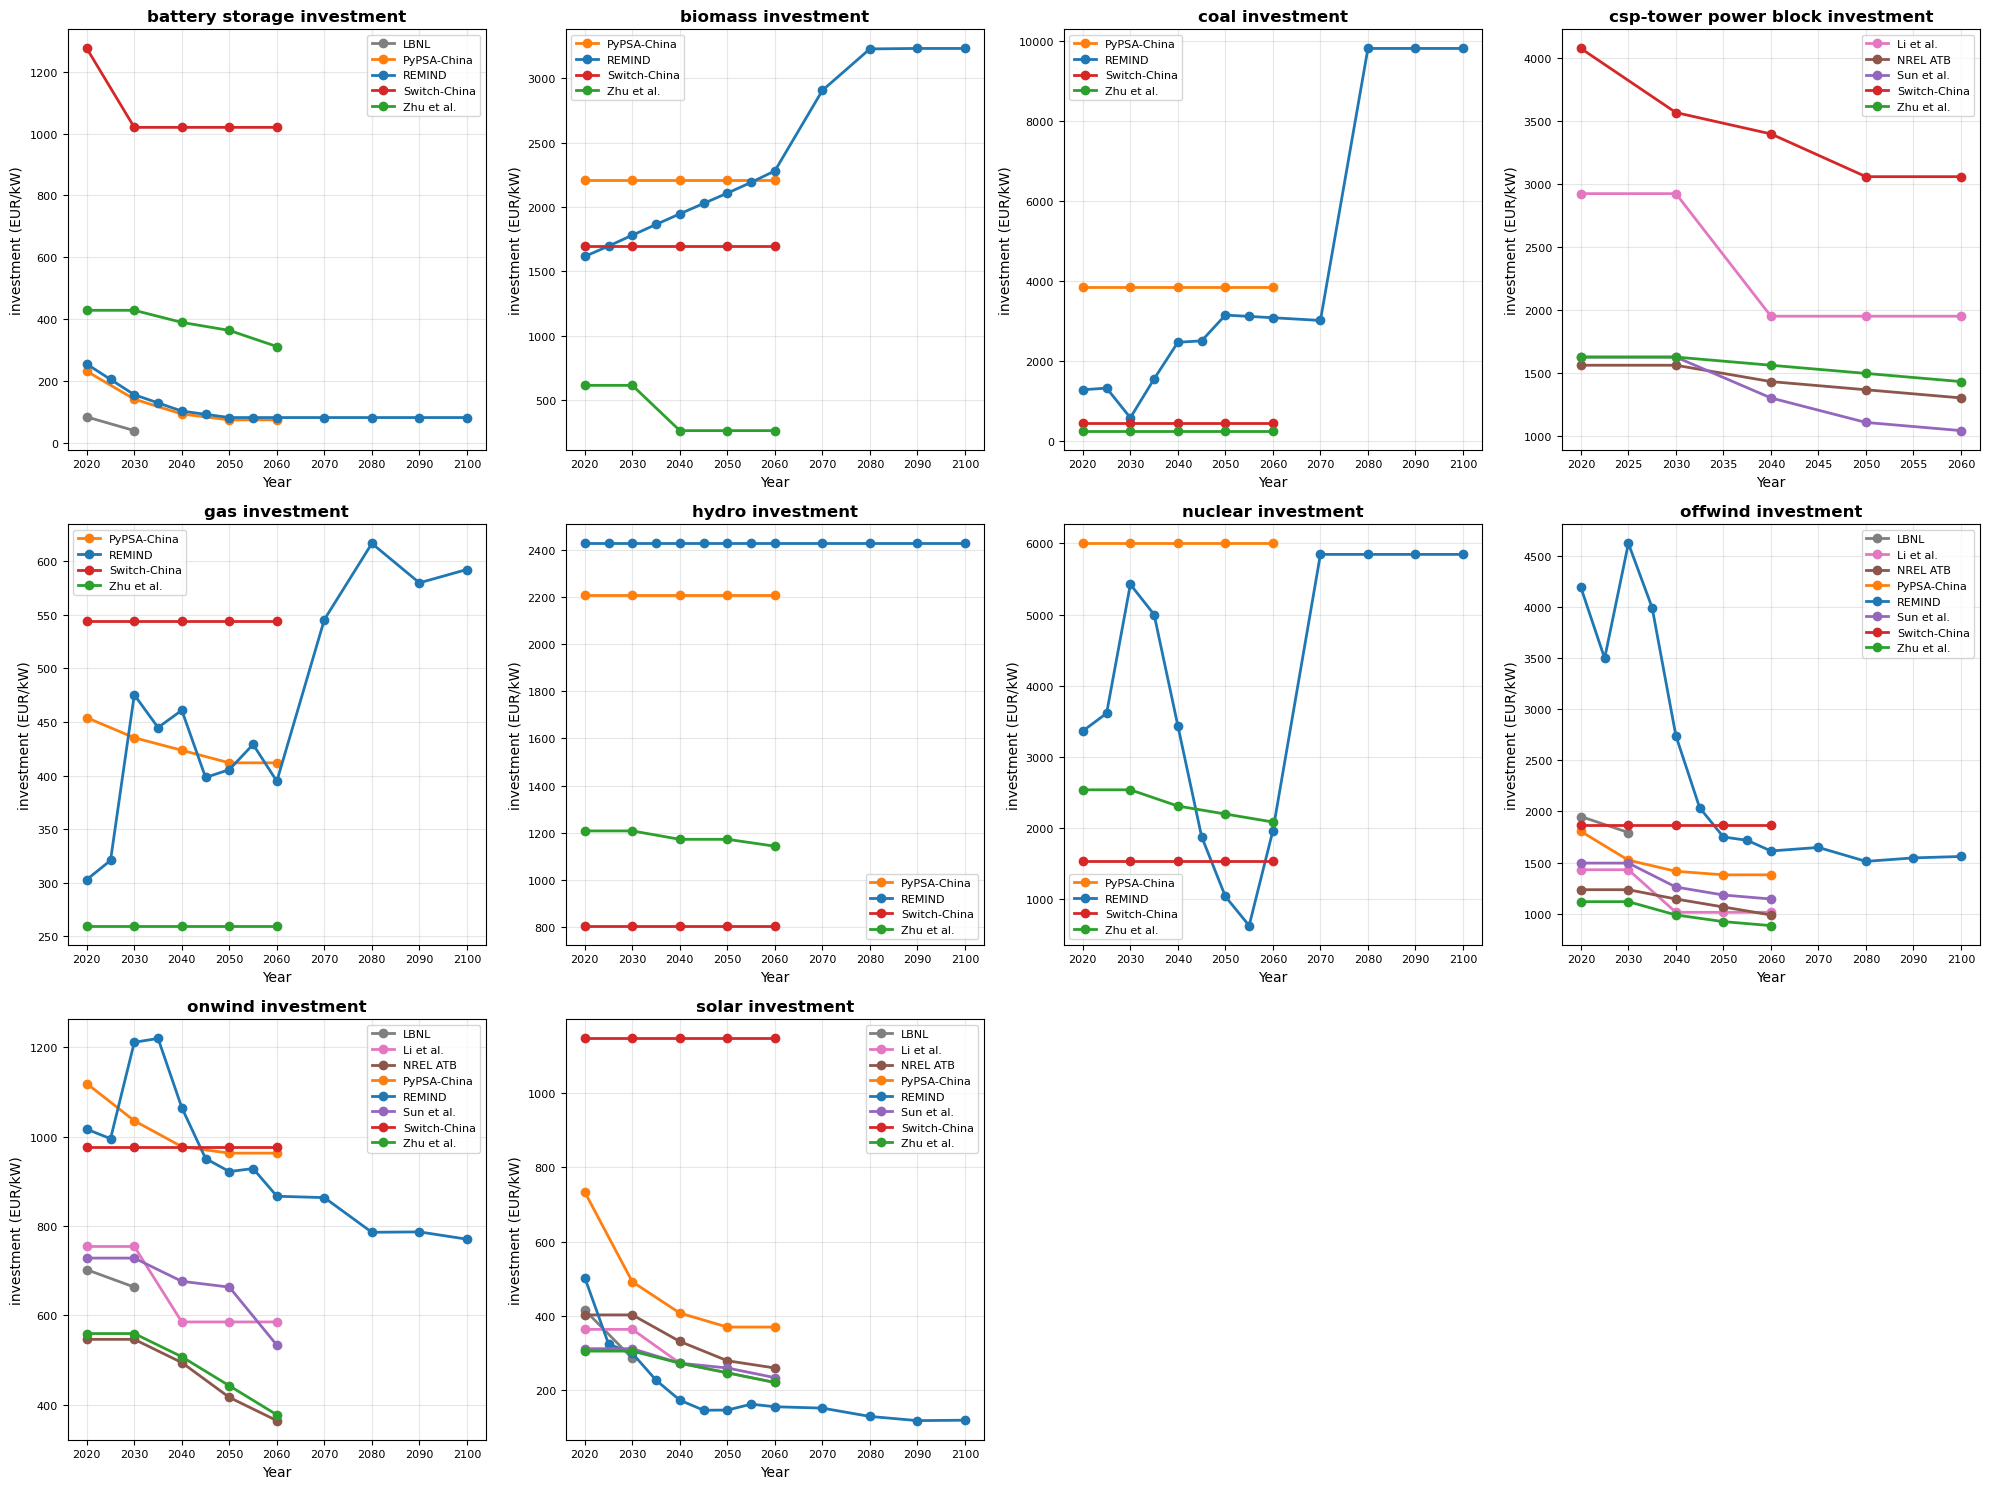

In [6]:
#!/usr/bin/env python3
"""
完整的成本对比分析脚本
处理三个数据源：REMIND、PyPSA-China和参考文献
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 技术名称映射字典
tech_mapping = {
    'solar-utility': 'solar',
    'solar': 'solar',
    'Distributed solar': 'solar',
    'onwind': 'onwind',
    'offwind': 'offwind',
    'nuclear': 'nuclear',
    'hydro': 'hydro',
    'PHS': 'hydro',  # 抽水蓄能归类为水电
    'biomass': 'biomass',
    'coal': 'coal',
    'gas': 'gas',
    'OCGT': 'gas',
    'CCGT': 'gas',
    'CSP': 'csp-tower power block',
    'battery storage': 'battery storage',
    'H2 pipeline': 'H2 (g) pipeline'
}

# 单位转换字典 (转换为EUR/kW)
# 单位转换字典 (转换为EUR/kW)
unit_conversion = {
    'cny/kw': 0.13,  # 1 CNY ≈ 0.13 EUR (近似汇率)
    'cny/kwh': 0.13,
    'eur/kw': 1.0,
    'eur/kwh': 1.0,
    'eur/mw': 0.001,
    'eur/mw/km': 0.001,
    'eur/km/mw': 0.001,
    'eur/mw': 0.001,
    'eur/kwh_h2': 1.0,
    'eur/kwel': 1.0,
    '$/mw': 0.001 * 0.85,  # 1 USD ≈ 0.85 EUR
    '$/mwh': 0.001 *0.85,         # 美元/兆瓦时 → 欧元/千瓦时
    '$/mw': 0.001 * 0.85,
    '$/mw/km': 0.001 * 0.85,
    'usd/mw': 0.001 * 0.85,
    'usd/mwh': 0.85,       # 美元/兆瓦时 → 欧元/千瓦时
    'usd/mw': 0.001 * 0.85,
    'usd/mw/km': 0.001 * 0.85,
    # 添加更多可能的单位变体
    'usd/mwh': 0.85,
    'usd/mwh': 0.85,
    'usd/mwh': 0.85,
    'usd/mwh': 0.85,
    'usd/mwh': 0.85,
}

# 安全转换数值的函数
def safe_convert_to_numeric(series):
    """安全地将系列转换为数值类型，处理非数值数据"""
    try:
        return pd.to_numeric(series, errors='coerce')
    except:
        return pd.to_numeric(series.astype(str), errors='coerce')

# 处理文献综述数据
def process_litreview_data():
    """处理文献综述数据"""
    print("处理文献综述数据...")
    
    # 尝试不同的编码方式读取文件
    encodings = ['utf-8', 'gbk', 'gb2312', 'latin1', 'cp1252', 'iso-8859-1']
    litreview_df = None
    
    for encoding in encodings:
        try:
            litreview_df = pd.read_csv('../../resources/data/costs/reference_costs/tech_costs_subset_litreview.csv', encoding=encoding)
            print(f"成功使用 {encoding} 编码读取文献综述文件")
            break
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"使用 {encoding} 编码时出现其他错误: {e}")
            continue
    
    if litreview_df is None:
        try:
            litreview_df = pd.read_csv('../../resources/data/costs/reference_costs/tech_costs_subset_litreview.csv', 
                                     encoding='utf-8', encoding_errors='ignore')
            print("使用UTF-8编码并忽略错误字符")
        except Exception as e:
            print(f"无法读取文献综述数据文件: {e}")
            return pd.DataFrame()
    
    # 只保留investment类型的数据
    df = litreview_df[litreview_df['cost_type'] == 'investment'].copy()
    print(f"investment类型数据形状: {df.shape}")
    
    # 应用技术名称映射
    df['technology_mapped'] = df['technology'].map(tech_mapping)
    
    # 只保留有映射的技术
    df = df.dropna(subset=['technology_mapped'])
    print(f"有映射技术的数据形状: {df.shape}")
    
    # 转换单位
    df['unit_lower'] = df['unit'].str.lower()
    df['conversion_factor'] = df['unit_lower'].map(unit_conversion)
    
    # 转换成本到EUR/kW
    years = ['2020', '2030', '2040', '2050', '2060']
    melted_data = []
    
    for year in years:
        if year in df.columns:
            # 安全转换数值
            df[f'{year}_numeric'] = safe_convert_to_numeric(df[year])
            df[f'{year}_eur_kw'] = df[f'{year}_numeric'] * df['conversion_factor']
            
            year_data = df[['technology_mapped', 'reference', f'{year}_eur_kw']].copy()
            year_data['year'] = int(year)
            year_data['cost_eur_kw'] = year_data[f'{year}_eur_kw']
            year_data = year_data.dropna(subset=['cost_eur_kw'])
            
            if len(year_data) > 0:
                melted_data.append(year_data[['technology_mapped', 'reference', 'year', 'cost_eur_kw']])
    
    if melted_data:
        result = pd.concat(melted_data, ignore_index=True)
        result = result.dropna(subset=['cost_eur_kw'])
        print(f"文献综述数据处理完成，形状: {result.shape}")
        return result
    else:
        print("文献综述数据没有有效数据")
        return pd.DataFrame()

# 处理REMIND数据
def process_remind_data():
    """处理REMIND数据"""
    print("处理REMIND数据...")
    
    remind_files = glob.glob('../../resources/derived_data/remindcosts/costs_*.csv')
    all_data = []
    
    for file in remind_files:
        year = int(file.split('_')[-1].replace('.csv', ''))
        print(f"正在处理REMIND {file} (年份: {year})")
        
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='latin1')
            except:
                df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
        
        # 只保留investment参数
        df = df[df['parameter'] == 'investment'].copy()
        
        # 应用技术名称映射
        df['technology_mapped'] = df['technology'].map(tech_mapping)
        
        # 只保留有映射的技术
        df = df.dropna(subset=['technology_mapped'])
        
        # 转换单位
        df['unit_lower'] = df['unit'].str.lower()
        df['conversion_factor'] = df['unit_lower'].map(unit_conversion)
        
        # 安全转换数值
        df['value_numeric'] = safe_convert_to_numeric(df['value'])
        df['cost_eur_kw'] = df['value_numeric'] * df['conversion_factor']
        
        # 添加年份和来源
        df['year'] = year
        df['reference'] = 'REMIND'
        
        # 只保留有效的数值
        df = df.dropna(subset=['cost_eur_kw'])
        if len(df) > 0:
            all_data.append(df[['technology_mapped', 'reference', 'year', 'cost_eur_kw']])
    
    if all_data:
        result = pd.concat(all_data, ignore_index=True)
        result = result.dropna(subset=['cost_eur_kw'])
        print(f"REMIND数据处理完成，形状: {result.shape}")
        return result
    else:
        print("REMIND数据没有有效数据")
        return pd.DataFrame()

# 处理PyPSA-China数据
def process_pypsa_china_data():
    """处理PyPSA-China数据"""
    print("处理PyPSA-China数据...")
    
    # 获取所有年份文件（排除modified文件）
    pypsa_files = glob.glob('resources/data/costs/costs_*.csv')
    pypsa_files = [f for f in pypsa_files if 'modified' not in f]
    all_data = []
    
    for file in pypsa_files:
        year = int(file.split('_')[-1].replace('.csv', ''))
        print(f"正在处理PyPSA-China {file} (年份: {year})")
        
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='latin1')
            except:
                df = pd.read_csv(file, encoding='utf-8', encoding_errors='ignore')
        
        # 只保留investment参数
        df = df[df['parameter'] == 'investment'].copy()
        
        # 应用技术名称映射
        df['technology_mapped'] = df['technology'].map(tech_mapping)
        
        # 只保留有映射的技术
        df = df.dropna(subset=['technology_mapped'])
        
        # 转换单位
        df['unit_lower'] = df['unit'].str.lower()
        df['conversion_factor'] = df['unit_lower'].map(unit_conversion)
        
        # 安全转换数值
        df['value_numeric'] = safe_convert_to_numeric(df['value'])
        df['cost_eur_kw'] = df['value_numeric'] * df['conversion_factor']
        
        # 添加年份和来源
        df['year'] = year
        df['reference'] = 'PyPSA-China'
        
        # 只保留有效的数值
        df = df.dropna(subset=['cost_eur_kw'])
        if len(df) > 0:
            all_data.append(df[['technology_mapped', 'reference', 'year', 'cost_eur_kw']])
    
    if all_data:
        result = pd.concat(all_data, ignore_index=True)
        result = result.dropna(subset=['cost_eur_kw'])
        print(f"PyPSA-China数据处理完成，形状: {result.shape}")
        return result
    else:
        print("PyPSA-China数据没有有效数据")
        return pd.DataFrame()

# ... existing code ...

# 主处理函数
def main():
    """主处理函数"""
    print("开始处理三个数据源的成本数据...")
    
    # 处理三个数据源
    litreview_processed = process_litreview_data()
    remind_processed = process_remind_data()
    pypsa_china_processed = process_pypsa_china_data()
    
    # 检查数据是否为空
    if litreview_processed.empty:
        print("文献综述数据为空")
    if remind_processed.empty:
        print("REMIND数据为空")
    if pypsa_china_processed.empty:
        print("PyPSA-China数据为空")
    
    # 合并所有数据
    all_data = pd.concat([litreview_processed, remind_processed, pypsa_china_processed], ignore_index=True)
    
    # 找出共同的技术
    all_technologies = set()
    if not litreview_processed.empty:
        all_technologies.update(litreview_processed['technology_mapped'].unique())
    if not remind_processed.empty:
        all_technologies.update(remind_processed['technology_mapped'].unique())
    if not pypsa_china_processed.empty:
        all_technologies.update(pypsa_china_processed['technology_mapped'].unique())
    
    print(f"\n所有技术: {sorted(all_technologies)}")
    
    # 过滤出有多个数据源的技术
    common_technologies = []
    for tech in sorted(all_technologies):
        tech_data = all_data[all_data['technology_mapped'] == tech]
        sources = tech_data['reference'].unique()
        if len(sources) >= 2:  # 至少有两个数据源
            common_technologies.append(tech)
            print(f"{tech}: {list(sources)}")
    
    if not common_technologies:
        print("没有找到共同的技术")
        return
    
    # 过滤出共同技术的数据
    filtered_data = all_data[all_data['technology_mapped'].isin(common_technologies)].copy()
    
    # 定义固定的颜色映射
    color_palette = {
        'REMIND': '#1f77b4',      # 蓝色
        'PyPSA-China': '#ff7f0e',  # 橙色
        'Zhu et al.': '#2ca02c',   # 绿色
        'Switch-China': '#d62728', # 红色
        'Sun et al.': '#9467bd',   # 紫色
        'NREL ATB': '#8c564b',     # 棕色
        'Li et al.': '#e377c2',    # 粉色
        'LBNL': '#7f7f7f'          # 灰色
    }
    
    # 创建图表
    n_techs = len(common_technologies)
    n_cols = 4
    n_rows = (n_techs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # 为每个技术创建子图
    for i, tech in enumerate(common_technologies):
        tech_data = filtered_data[filtered_data['technology_mapped'] == tech]
        
        # 按年份和来源分组计算平均值
        pivot_data = tech_data.groupby(['year', 'reference'])['cost_eur_kw'].mean().reset_index()
        
        # 创建折线图，使用固定的颜色映射
        for source in pivot_data['reference'].unique():
            source_data = pivot_data[pivot_data['reference'] == source]
            color = color_palette.get(source, '#000000')  # 默认黑色
            axes[i].plot(source_data['year'], source_data['cost_eur_kw'], 
                        marker='o', linewidth=2, markersize=6, 
                        label=source, color=color)
        
        axes[i].set_title(f'{tech} investment', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Year', fontsize=10)
        axes[i].set_ylabel('investment (EUR/kW)', fontsize=10)
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='both', which='major', labelsize=8)
    
    # 隐藏多余的子图
    for i in range(len(common_technologies), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# ... existing code ...
    

if __name__ == "__main__":
    main() 